# Play Liar's Dice in a Statistical Ways...

One day I went to bar with my friends and suddenly think of some interesting strategy when playing Liar's Dice. Here is the situation: No body on that table are really good at this game, they are just normal people doesn't have much insight on this game. 

I assume the following:

1. There are very few external factors to influence one decision during the game. (eg. Psychological Influence)
2. The dice are fair dice.
3. Each cup must contain 5 dice.
4. Assume the basic rules of the game.

Import all the libaray

In [1]:
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

My strategy is like this: I don't need to look at what number are facing up on my dice each game. I just close my eyes and listen to what they say & follow the tuple suggest by the last person with a +1 to it. 

For example (6 four, I will say 6 five) (7 six, I will say 8 two)

because 1 on dice represent any number, so every tuple end with six will followed by two.

First function will simulate one game, with specifing how many persons are in the game and how many dice are in each cup.

Second function would summarize the result and calculate the total number of count from 1 to 6 on the table.(This part is uncertain, but it doesn't matter)

Later on I will use the third function run 20000 episode. There will be a statistical pattern showing that: 

The probability of X counts of each side dice will follow a multinomial distribution. It models the probability of counts of each side for rolling a 6-sided dice 5 * count of people times.

In [2]:
def simulation(persons=2,cup_contain=5):
    result = []
    dist_variables = [1,2,3,4,5,6]
    count_variable = range(len(dist_variables)*persons)
    for i in range(persons):
        temp = []
        for d in range(cup_contain):
            temp.append(np.random.choice(dist_variables))
        result.append(temp)
    return result

def summarize_states(simulation_result=None):
    flattened_list = []
    for l in simulation_result:
        for e in l:
            flattened_list.append(e)
            
    count_dict = {}
    for item in flattened_list:
        if item in list(count_dict.keys()):
            count_dict[item] += 1
        else:
            count_dict[item] = 1
    return count_dict

def run_episode(e=10000,persons=5,jai=True):
    s = pd.Series(index=range(0,5*persons+1),data=[0 for i in range(0,5*persons+1)])
    result = {1:s,
              2:s,
              3:s,
              4:s,
              5:s,
              6:s}
    for i in range(e):
        count_dict = summarize_states(simulation_result=simulation(persons=persons))
        for key in list(count_dict.keys()):
            if jai:
                if key == 1:
                    for k in range(2,7):
                        if k in list(count_dict.keys()):
                            count_dict[k] += count_dict[key]
                        else:
                            count_dict[k] = count_dict[key]
                    corrs_keys_value = count_dict[key]
                    result[key][corrs_keys_value] += 1
                else:
                    corrs_keys_value = count_dict[key]
                    result[key][corrs_keys_value] += 1
            else:
                corrs_keys_value = count_dict[key]
                result[key][corrs_keys_value] += 1
    return result    

A. Lets try 2 person:

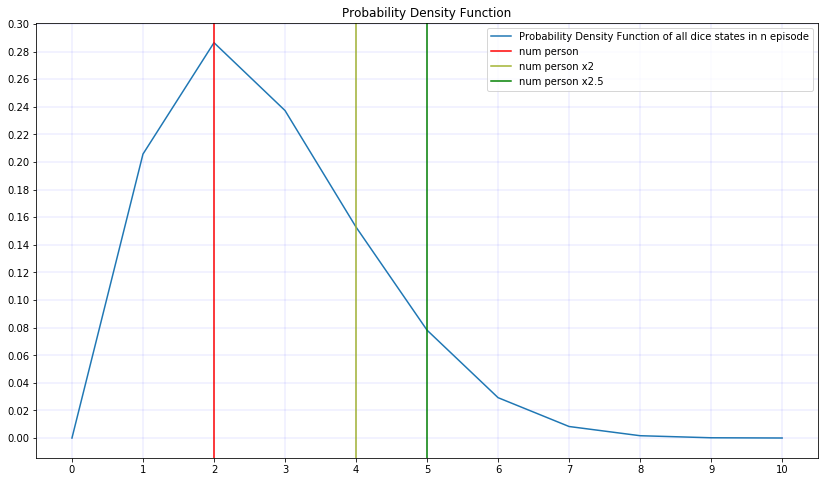

In [3]:
e = 20000
persons=2
result = run_episode(e=e,persons=persons)

fig, ax = plt.subplots(figsize=(14,8))
ax.plot((result[1]/sum(result[1])),label="Probability Density Function of all dice states in n episode")

#tl = np.arange(0, 36, step=2)
#plt.xticks(ticks=tl,labels=tl)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_major_locator(MultipleLocator(0.02))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.grid(color='b', linestyle='-', linewidth=0.1)
plt.axvline(x=persons,color='r',label="num person")
plt.axvline(x=persons*2,color='#a1b330',label="num person x2")
plt.axvline(x=persons*2.5,color='g',label="num person x2.5")

plt.title("Probability Density Function")

plt.legend()

Lets try 3 person:

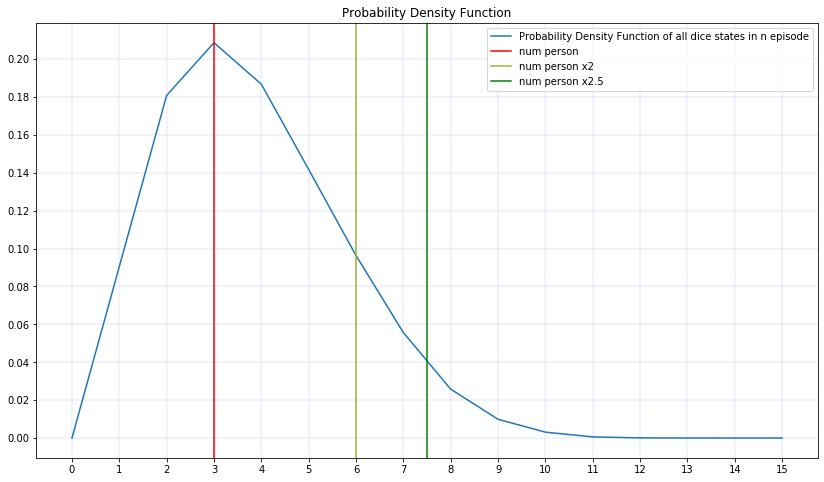

In [4]:
e = 20000
persons=3
result = run_episode(e=e,persons=persons)

fig, ax = plt.subplots(figsize=(14,8))
ax.plot((result[1]/sum(result[1])),label="Probability Density Function of all dice states in n episode")

#tl = np.arange(0, 36, step=2)
#plt.xticks(ticks=tl,labels=tl)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_major_locator(MultipleLocator(0.02))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.grid(color='b', linestyle='-', linewidth=0.1)
plt.axvline(x=persons,color='r',label="num person")
plt.axvline(x=persons*2,color='#a1b330',label="num person x2")
plt.axvline(x=persons*2.5,color='g',label="num person x2.5")

plt.title("Probability Density Function")

plt.legend()

Let's try 6 person:

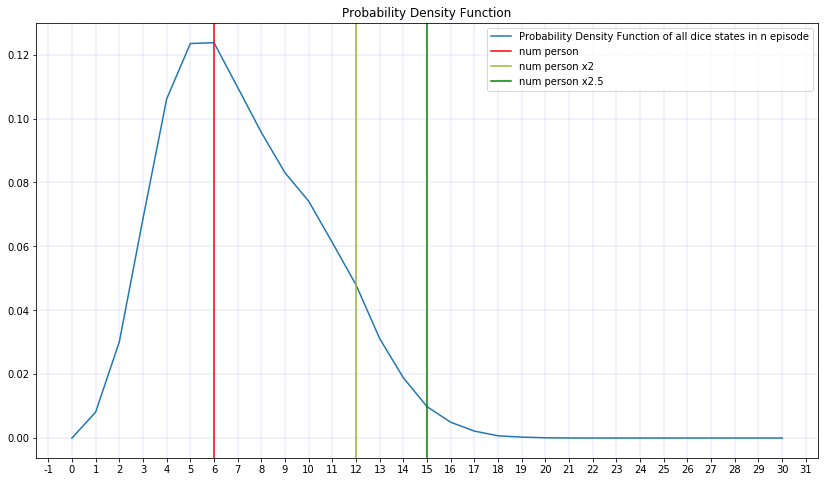

In [5]:
e = 20000
persons=6
result = run_episode(e=e,persons=persons)

fig, ax = plt.subplots(figsize=(14,8))
ax.plot((result[1]/sum(result[1])),label="Probability Density Function of all dice states in n episode")

#tl = np.arange(0, 36, step=2)
#plt.xticks(ticks=tl,labels=tl)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_major_locator(MultipleLocator(0.02))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.grid(color='b', linestyle='-', linewidth=0.1)
plt.axvline(x=persons,color='r',label="num person")
plt.axvline(x=persons*2,color='#a1b330',label="num person x2")
plt.axvline(x=persons*2.5,color='g',label="num person x2.5")

plt.title("Probability Density Function")

plt.legend()

As we can see, the distribution are getting slimmer and most importantly, if we mutiply the count of person in a game by 2 or 2.5, then we will got a number, let's call in (T(2||2.5)).

The probability of counts of each side for rolling a 6-sided dice n times (P) larger than (T) is very low. In 6 persons game, P > T(2) is just 11.5%.

That means, if anyone person says a count of dice that is larger then this T number, there will be a very low chance to loss the game. In this case, only 11.5% will lose if we follow this strategy (Close ur eyes, don't look at the cup just listen the latest count of dice.)

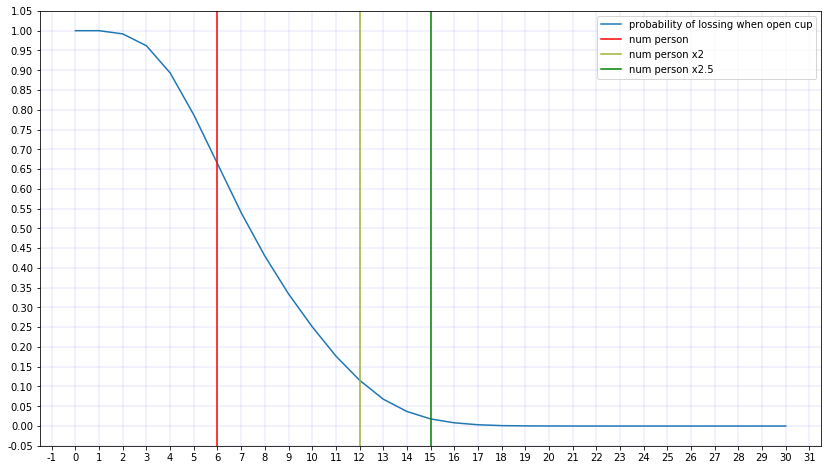

In [6]:
a = (result[1]/sum(result[1]))
s = pd.Series()
for i in range(len(a)):
    s[str(i)] = sum(a.iloc[i:])
    

fig, ax = plt.subplots(figsize=(14,8))
ax.plot(s, label="probability of lossing when open cup")

#tl = np.arange(0, 36, step=2)
#plt.xticks(ticks=tl,labels=tl)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_major_locator(MultipleLocator(0.05))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.grid(color='b', linestyle='-', linewidth=0.1)

plt.axvline(x=persons,color='r',label="num person")
plt.axvline(x=persons*2,color='#a1b330',label="num person x2")
plt.axvline(x=persons*2.5,color='g',label="num person x2.5")

plt.legend()

Probability of lossing if count arrive X at a given circumstances:

In [7]:
# Here are the precise probability
s

0     1.000000
1     1.000000
2     0.991885
3     0.961783
4     0.893130
5     0.786996
6     0.663485
7     0.539715
8     0.429949
9     0.334273
10    0.251238
11    0.177097
12    0.115914
13    0.067976
14    0.036853
15    0.018004
16    0.008182
17    0.003246
18    0.001071
19    0.000376
20    0.000092
21    0.000008
22    0.000000
23    0.000000
24    0.000000
25    0.000000
26    0.000000
27    0.000000
28    0.000000
29    0.000000
30    0.000000
dtype: float64

To conclude:

The lesser people play the game. the parameter of T should tune larger. For example T(2.5)
Anyone person says a count of dice that is larger then this T number, there will be a very low chance to loss the game.
